<a href="https://colab.research.google.com/github/Farah-Saleem91/heart-disease-predictions-/blob/main/Simple_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df=pd.read_csv('/content/drive/MyDrive/heart - heart (1).csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Train Test split
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Check class balance
y_train.value_counts(normalize=True)

,proportion
HeartDisease,
1,0.546512
0,0.453488


In [19]:
# i decided to impute by median because median is not influenced by extreme values.
num_cols = X_train.select_dtypes('number').columns
num_scaler = StandardScaler()
num_pipe = make_pipeline( num_scaler)
num_tuple = ('numaric', num_pipe, num_cols)
print(num_tuple)

cat_cols = X_train.select_dtypes('object').columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_pipe = make_pipeline(ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
print(ohe_tuple)

('numaric', Pipeline(steps=[('standardscaler', StandardScaler())]), Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))
('categorical', Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))


In [20]:
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor



ColumnTransformer(transformers=[('numaric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))],
                  verbose_feature_names_out=False)

In [21]:
# process the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [26]:
X_train_processed.shape[1]

20

In [31]:
# create and compile the model
model =Sequential()
model.add(Dense(11, input_dim=X_train_processed.shape[1],
          activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'bce', metrics = ['accuracy'])

In [32]:
# train the model and save the history
history = model.fit(X_train_processed, y_train,
          validation_split=.2,
          epochs = 10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5392 - loss: 0.6979 - val_accuracy: 0.6667 - val_loss: 0.6264
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6378 - loss: 0.6386 - val_accuracy: 0.7174 - val_loss: 0.5932
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6512 - loss: 0.6268 - val_accuracy: 0.7826 - val_loss: 0.5646
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7439 - loss: 0.5690 - val_accuracy: 0.7971 - val_loss: 0.5372
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7621 - loss: 0.5490 - val_accuracy: 0.7899 - val_loss: 0.5155
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7697 - loss: 0.5325 - val_accuracy: 0.8043 - val_loss: 0.4979
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 0.5084 - val_accuracy: 0.7971 - val_loss: 0.4829
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7814 - loss: 0.4887 - val_accuracy: 0.8116 - val_loss

(<Figure size 600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>], dtype=object))

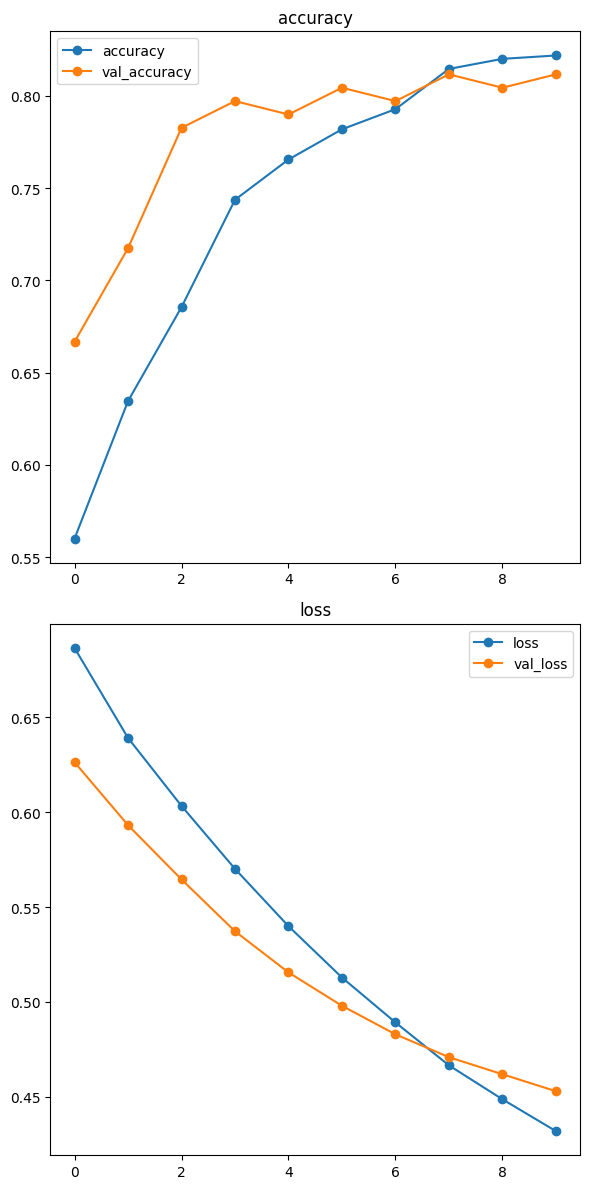

In [33]:
plot_history (history)

In [34]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7683 - loss: 0.4584


{'accuracy': 0.800000011920929, 'loss': 0.4278363287448883}

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        98
           1       0.83      0.82      0.82       132

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



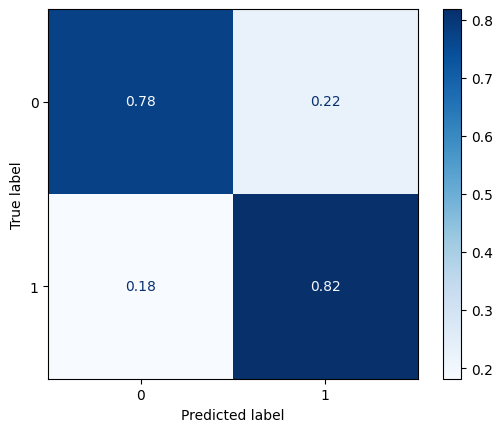

In [38]:
test_preds = model.predict(X_test_processed).round()
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report (y_test, test_preds))
ConfusionMatrixDisplay.from_predictions (y_test, test_preds, cmap='Blues', normalize='true');

#Create model 2

In [39]:
# create model
model2 = Sequential()
model2.add(Dense(20, input_dim=X_train_processed.shape[1],
          activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'adam', loss = 'bce', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# train the model and save the history
history = model2.fit(X_train_processed, y_train,
          validation_split=(.2),
          epochs = 10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6429 - loss: 0.6691 - val_accuracy: 0.6884 - val_loss: 0.6503
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7494 - loss: 0.6166 - val_accuracy: 0.7899 - val_loss: 0.6030
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7980 - loss: 0.5692 - val_accuracy: 0.8043 - val_loss: 0.5554
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8462 - loss: 0.5230 - val_accuracy: 0.8188 - val_loss: 0.5143
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8478 - loss: 0.4803 - val_accuracy: 0.8478 - val_loss: 0.4762
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8506 - loss: 0.4461 - val_accuracy: 0.8551 - val_loss: 0.4449
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8422 - loss: 0.4241 - val_accuracy: 0.8551 - val_loss: 0.4200
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8760 - loss: 0.3663 - val_accuracy: 0.8551 - v

In [41]:
# Evaluate neural network with builtin evaluation
result = model2.evaluate(X_test_processed, y_test,return_dict=True)
result

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - loss: 0.4019 


{'accuracy': 0.856521725654602, 'loss': 0.3711699843406677}

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



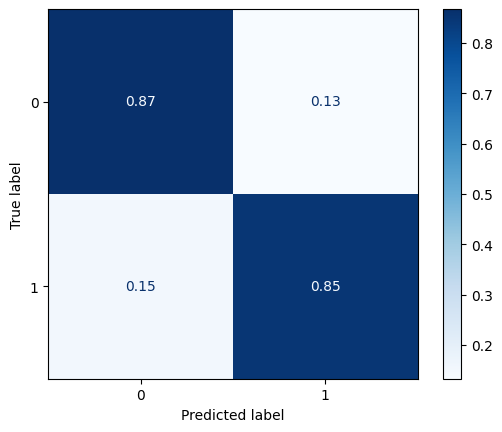

In [42]:
test_preds = model2.predict(X_test_processed).round()
print(classification_report (y_test, test_preds))
ConfusionMatrixDisplay.from_predictions (y_test, test_preds, cmap='Blues', normalize='true');